In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
import datetime
import seaborn as sns; sns.set()
sns.set_color_codes()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler("zsiW0IGoOyRCt07JUtZflCSym", "bDeg1hSbXiVEiBv70svT5ATC1TqnHiWMOAzA757K4pqR5VkIL7")
auth.set_access_token("54252997-7w475b34jXO3ryP2JqTai9rGNqANApH6ol86EvBcr", "093PpqbTQzfVleJpOQmFckmfMspjUklOSooUvYkORrXcR")
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

found_data = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text = []
dates = []
news_org = []
for target in target_users:    
    counter = 1
    for x in range(1,6):
        
        public_tweets = api.user_timeline(target, page=x)
        
        for tweet in public_tweets:
            
            results = analyzer.polarity_scores(tweet["text"])
            
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
            
            found_data.append({"Date": tweet["created_at"], 
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neu,
                                "Neutral": neg,
                                "Tweets Ago": counter,
                                "Source Account": target,
                               "Text": tweet["text"]
                              })
        
        
    
            counter += 1

In [18]:
found_data_pd = pd.DataFrame.from_dict(found_data)
found_data_pd.to_csv("Found_Data_Dataframe.csv", encoding='utf-8')
found_data_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source Account,Text,Tweets Ago
0,0.5106,Mon Jun 25 20:01:30 +0000 2018,0.677,0.000,0.323,@BBCWorld,Trump to Waters: 'Be careful what you wish for...,1
1,-0.2040,Mon Jun 25 20:01:30 +0000 2018,0.586,0.262,0.152,@BBCWorld,RT @BBCSport: FULL TIME: #IRN 1-1 #POR.\n\nAn ...,2
2,0.0000,Mon Jun 25 20:00:19 +0000 2018,1.000,0.000,0.000,@BBCWorld,An extraordinary denouement to Group B https:/...,3
3,0.6114,Mon Jun 25 19:56:35 +0000 2018,0.815,0.000,0.185,@BBCWorld,RT @BBCSport: FT: #ESP 2-2 #MAR \n\nDramatic f...,4
4,-0.7074,Mon Jun 25 19:53:36 +0000 2018,0.708,0.236,0.055,@BBCWorld,RT @BBCSport: GOAL! Iran 1-1 Portugal. \n\nAns...,5


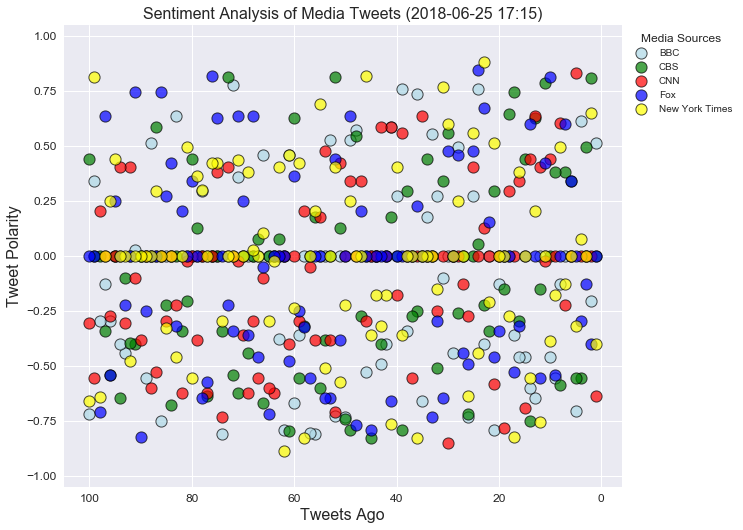

In [14]:
bbcPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@BBCWorld"]
cbsPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@CBSNews"]
cnnPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@CNN"]
foxPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@FoxNews"]
nytPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@nytimes"]

bbcPlt = plt.scatter(bbcPlotter["Tweets Ago"], bbcPlotter["Compound"], c='lightblue', s=125,
                    alpha = .7, edgecolors="black", label="BBC", linewidths=1 )

cbsPlt = plt.scatter(cbsPlotter["Tweets Ago"], cbsPlotter["Compound"], c='green', s=125,
                    alpha = .7, edgecolors="black", label="CBS", linewidths=1 )

cnnPlt = plt.scatter(cnnPlotter["Tweets Ago"], cnnPlotter["Compound"], c='red', s=125,
                    alpha = .7, edgecolors="black", label="CNN", linewidths=1 )

foxPlt = plt.scatter(foxPlotter["Tweets Ago"], foxPlotter["Compound"], c='blue', s=125,
                    alpha = .7, edgecolors="black", label="Fox", linewidths=1 )

nytPlt = plt.scatter(nytPlotter["Tweets Ago"], nytPlotter["Compound"], c='yellow', s=125,
                    alpha = .7, edgecolors="black", label="New York Times", linewidths=1 )

now = datetime.datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

sns.set(rc={'figure.figsize':(10,8.5)})

font = {'size':16}
tic_font = {'size':12}
plt.xlabel("Tweets Ago", **font)
plt.ylabel("Tweet Polarity", **font)
plt.yticks(**tic_font)
plt.xticks(**tic_font)
plt.title(f"Sentiment Analysis of Media Tweets ({now})", **font)
plt.xlim([nytPlotter["Tweets Ago"].max()+5,nytPlotter["Tweets Ago"].min()-5])
plt.ylim(-1.05,1.05)
plt.legend(handles=[bbcPlt, cbsPlt, cnnPlt, foxPlt, nytPlt], bbox_to_anchor=(1, 1) , title= "Media Sources")
plt.savefig('News_Mood.png', bbox_inches='tight')
plt.show('News_Mood.png')